In [1]:
import numpy as np
from matplotlib import pyplot as plt

import time
np.random.seed(time.gmtime())

%matplotlib inline
%config InlineBackend.figure_format='retina'
#!pip install git+https://github.com/M-Bianchi/My_matplotlib_style
plt.style.use('mystyle')

### Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.
 

# Code

In [2]:
N = int(1e6)

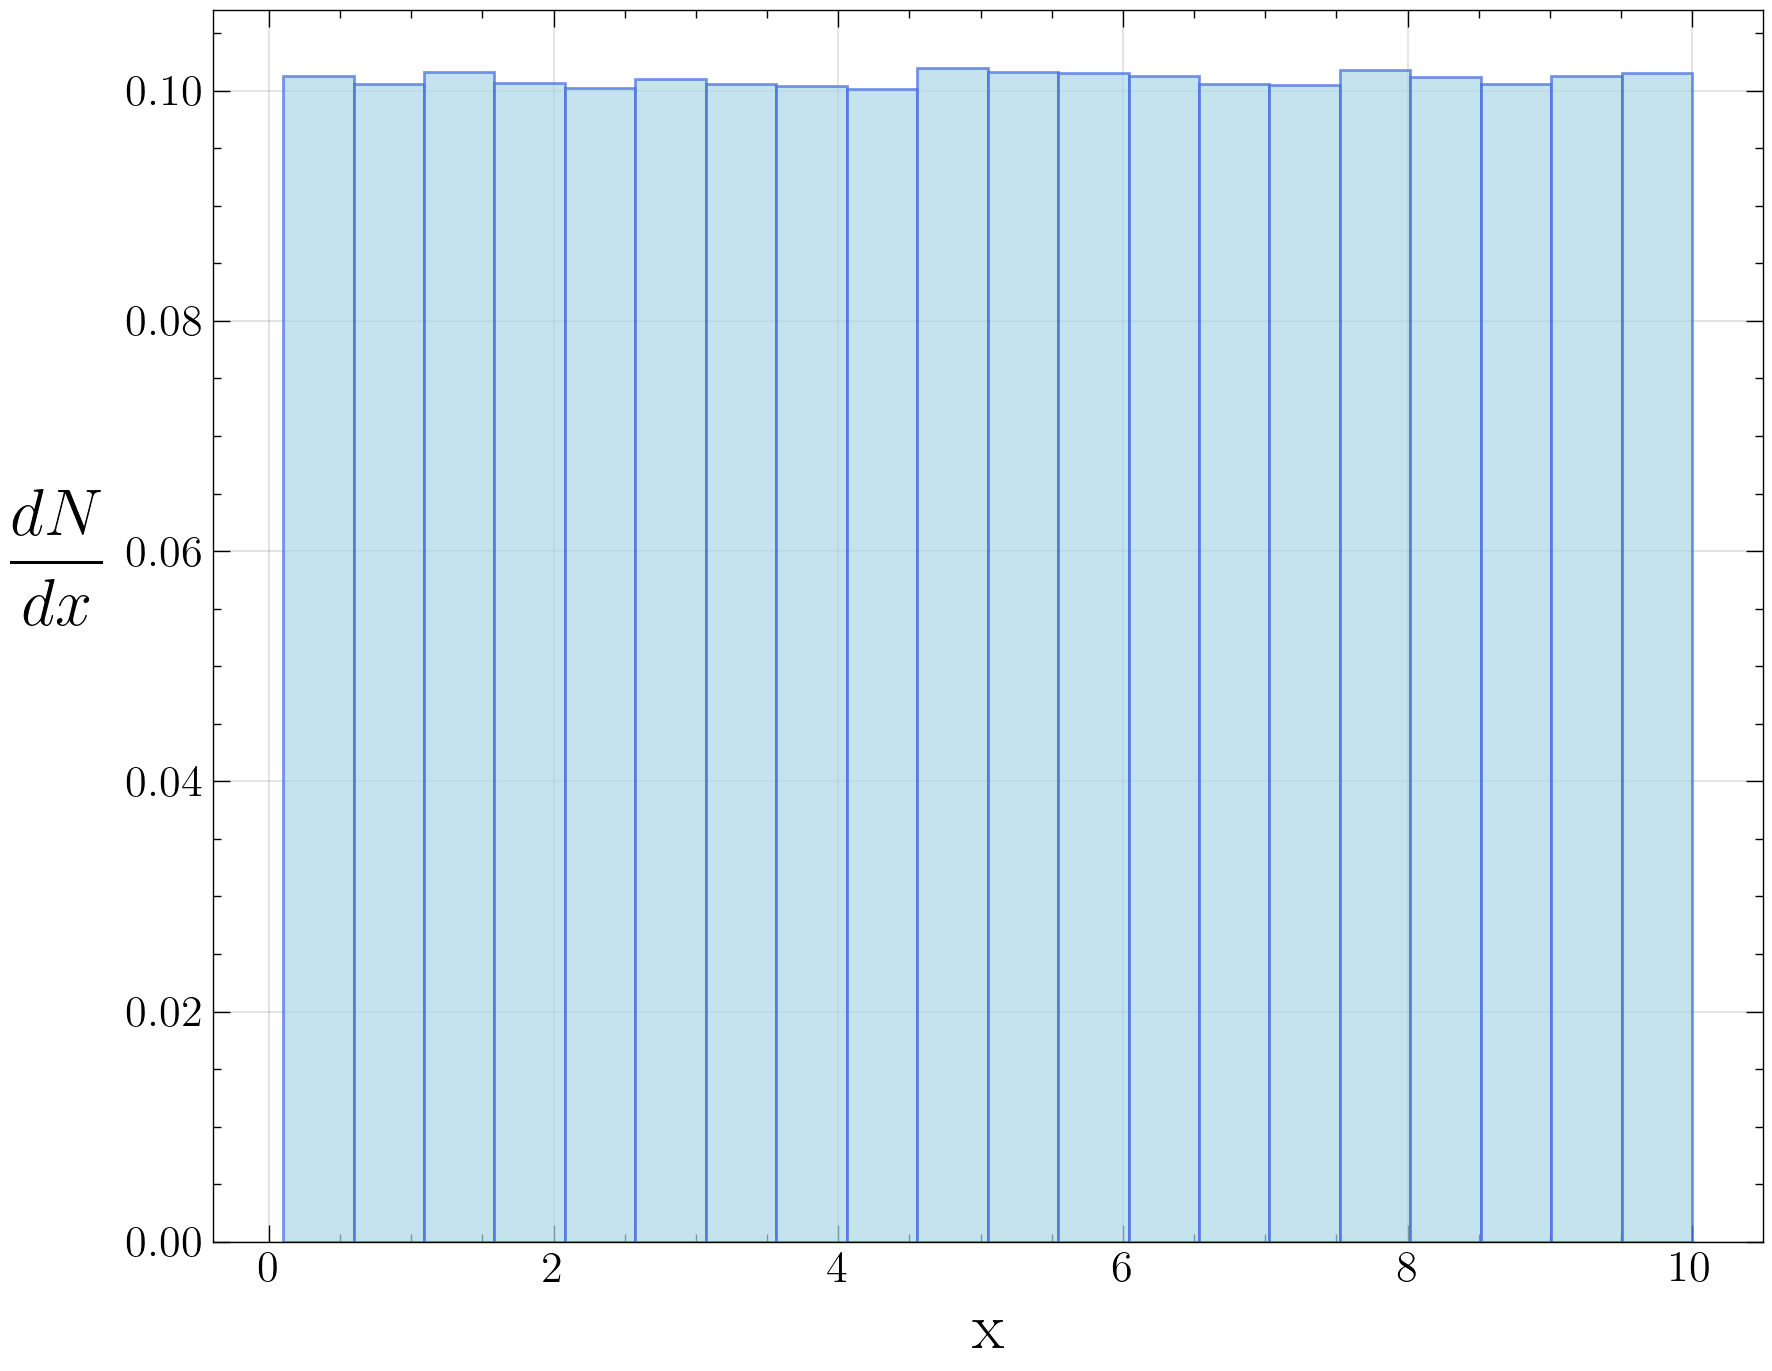

In [3]:
x = np.random.uniform(low=0.1, high=10., size=N)
plt.hist(x, bins=20, density=True, color='lightblue', edgecolor='royalblue', alpha=0.7)
plt.xlabel('x')
plt.ylabel('$\\dfrac{dN}{dx}$', rotation=0, labelpad=25);

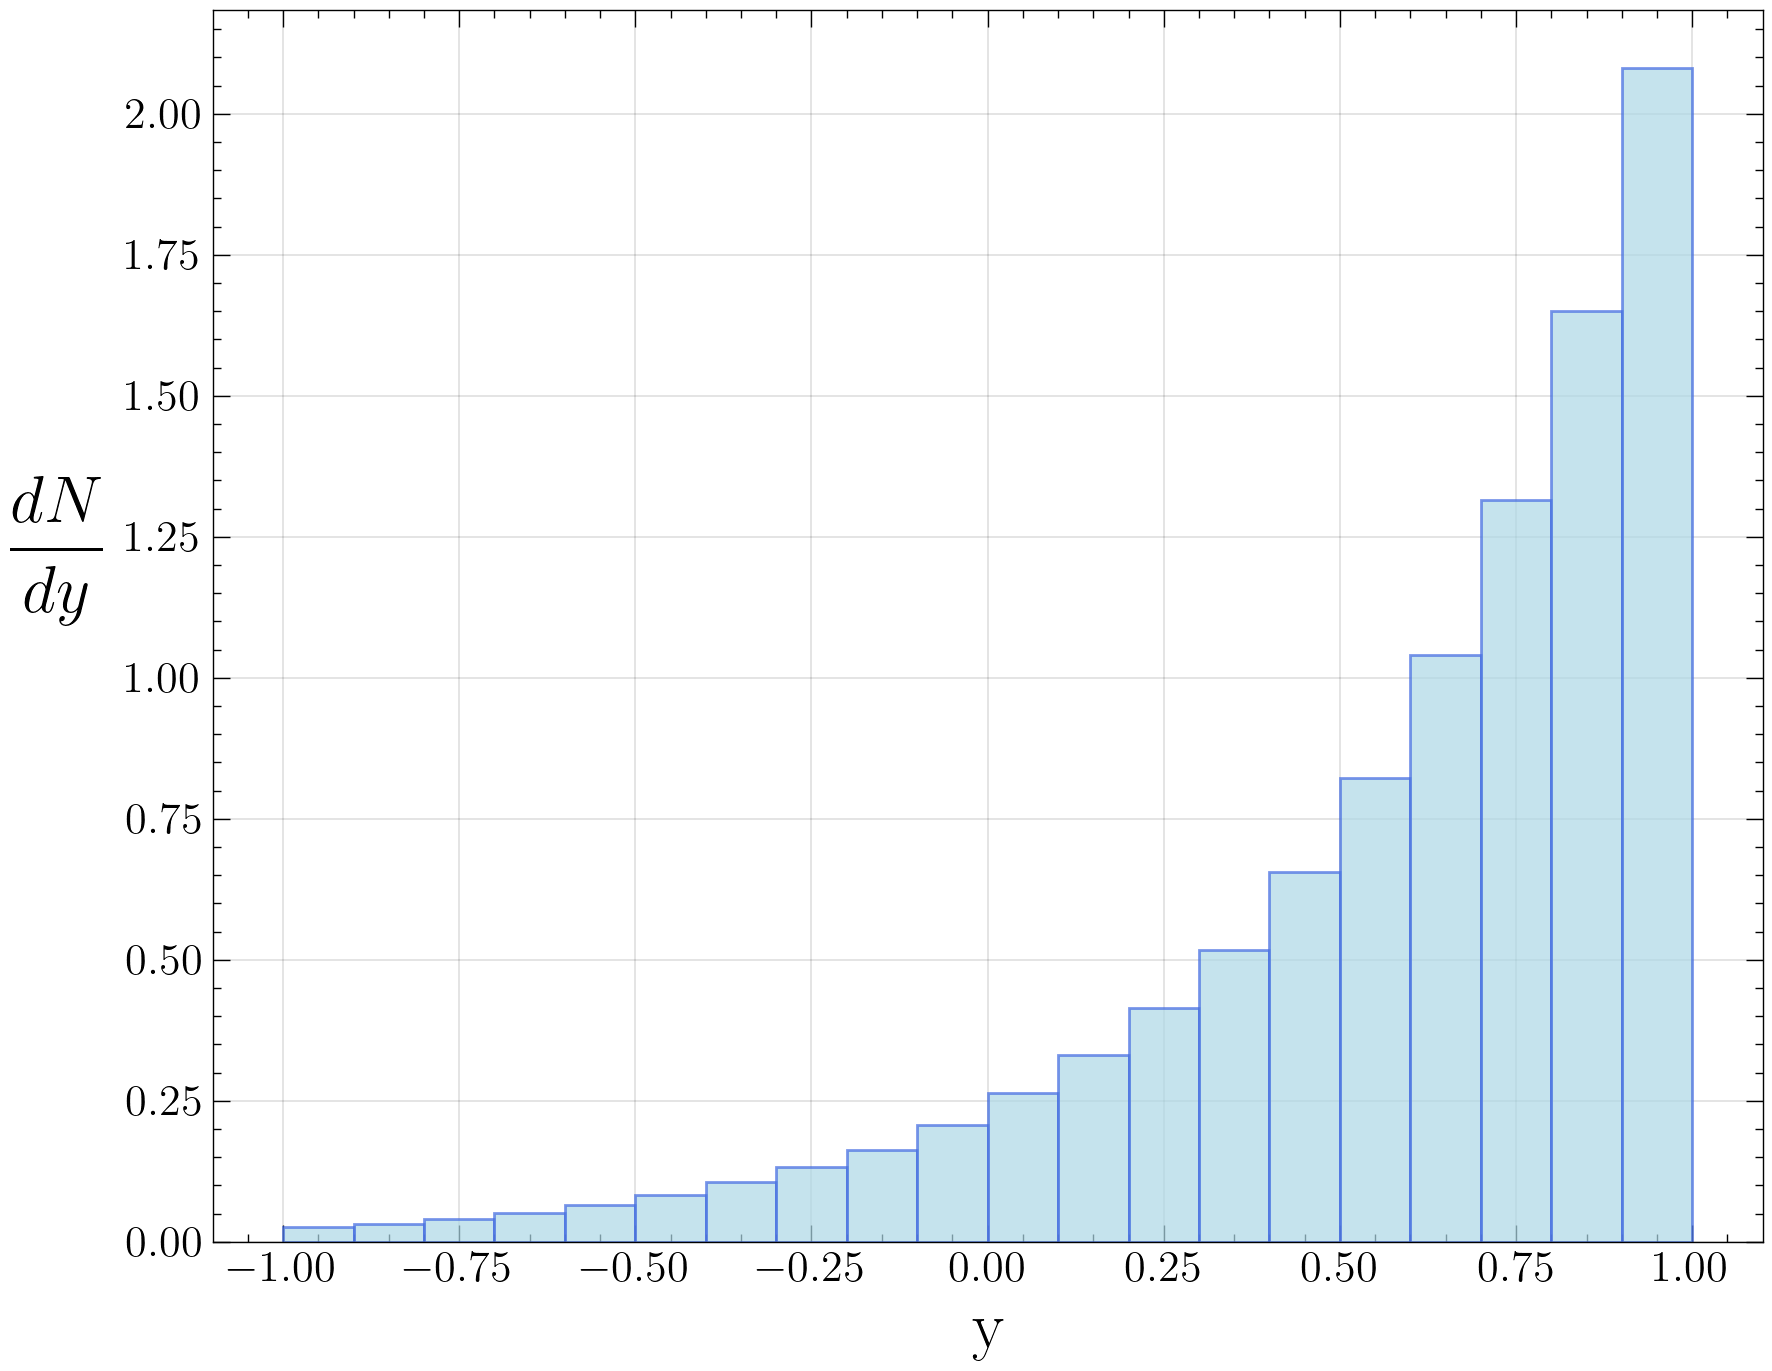

In [4]:
y = np.log10(x)
plt.hist(y, bins=20, density=True, color='lightblue', edgecolor='royalblue', alpha=0.7)
plt.xlabel('y')
plt.ylabel('$\\dfrac{dN}{dy}$', rotation=0, labelpad=25);

Consider a random variable $x$ with pdf $p_x(x)$ and another random variable $y = f(x)$. We want to find $p_y(y)$.

The probability must be conserved and, in particular, the probability of having $x < x_o$ must be equal to the probability of having $y < y_o=f(x_o)$. 

$$
P_x(x_o) = \int_{-\infty}^{x_o} p_x(x) \,dx = P_y(y_o) = \int_{-\infty}^{y_o} p_y(y) \,dy 
$$

$$
p_y(y_o) = \dfrac{dP_y(y_o)}{dy} = \dfrac{d}{dy} \left( \int_{-\infty}^{x_o} p_x(x) \,dx \right) = \dfrac{dx}{dy} \dfrac{d}{dx} \left( \int_{-\infty}^{x_o} p_x(x) \,dx \right) = \dfrac{dx}{dy} \: p_x(x_o) 
$$

$$
p_y(y) = \dfrac{dx}{dy} \: p_x(f^{-1}(y))
$$

In this case: $p_y(y) = \dfrac{d(10^y)}{dy} \times p_x(10^y) = \ln(10) \times 10^y \times p_x(10^y) = \ln(10) \times 10^y \times \dfrac{1}{10 - 0.1} = \dfrac{\ln(10)}{9.9} \times 10^y$

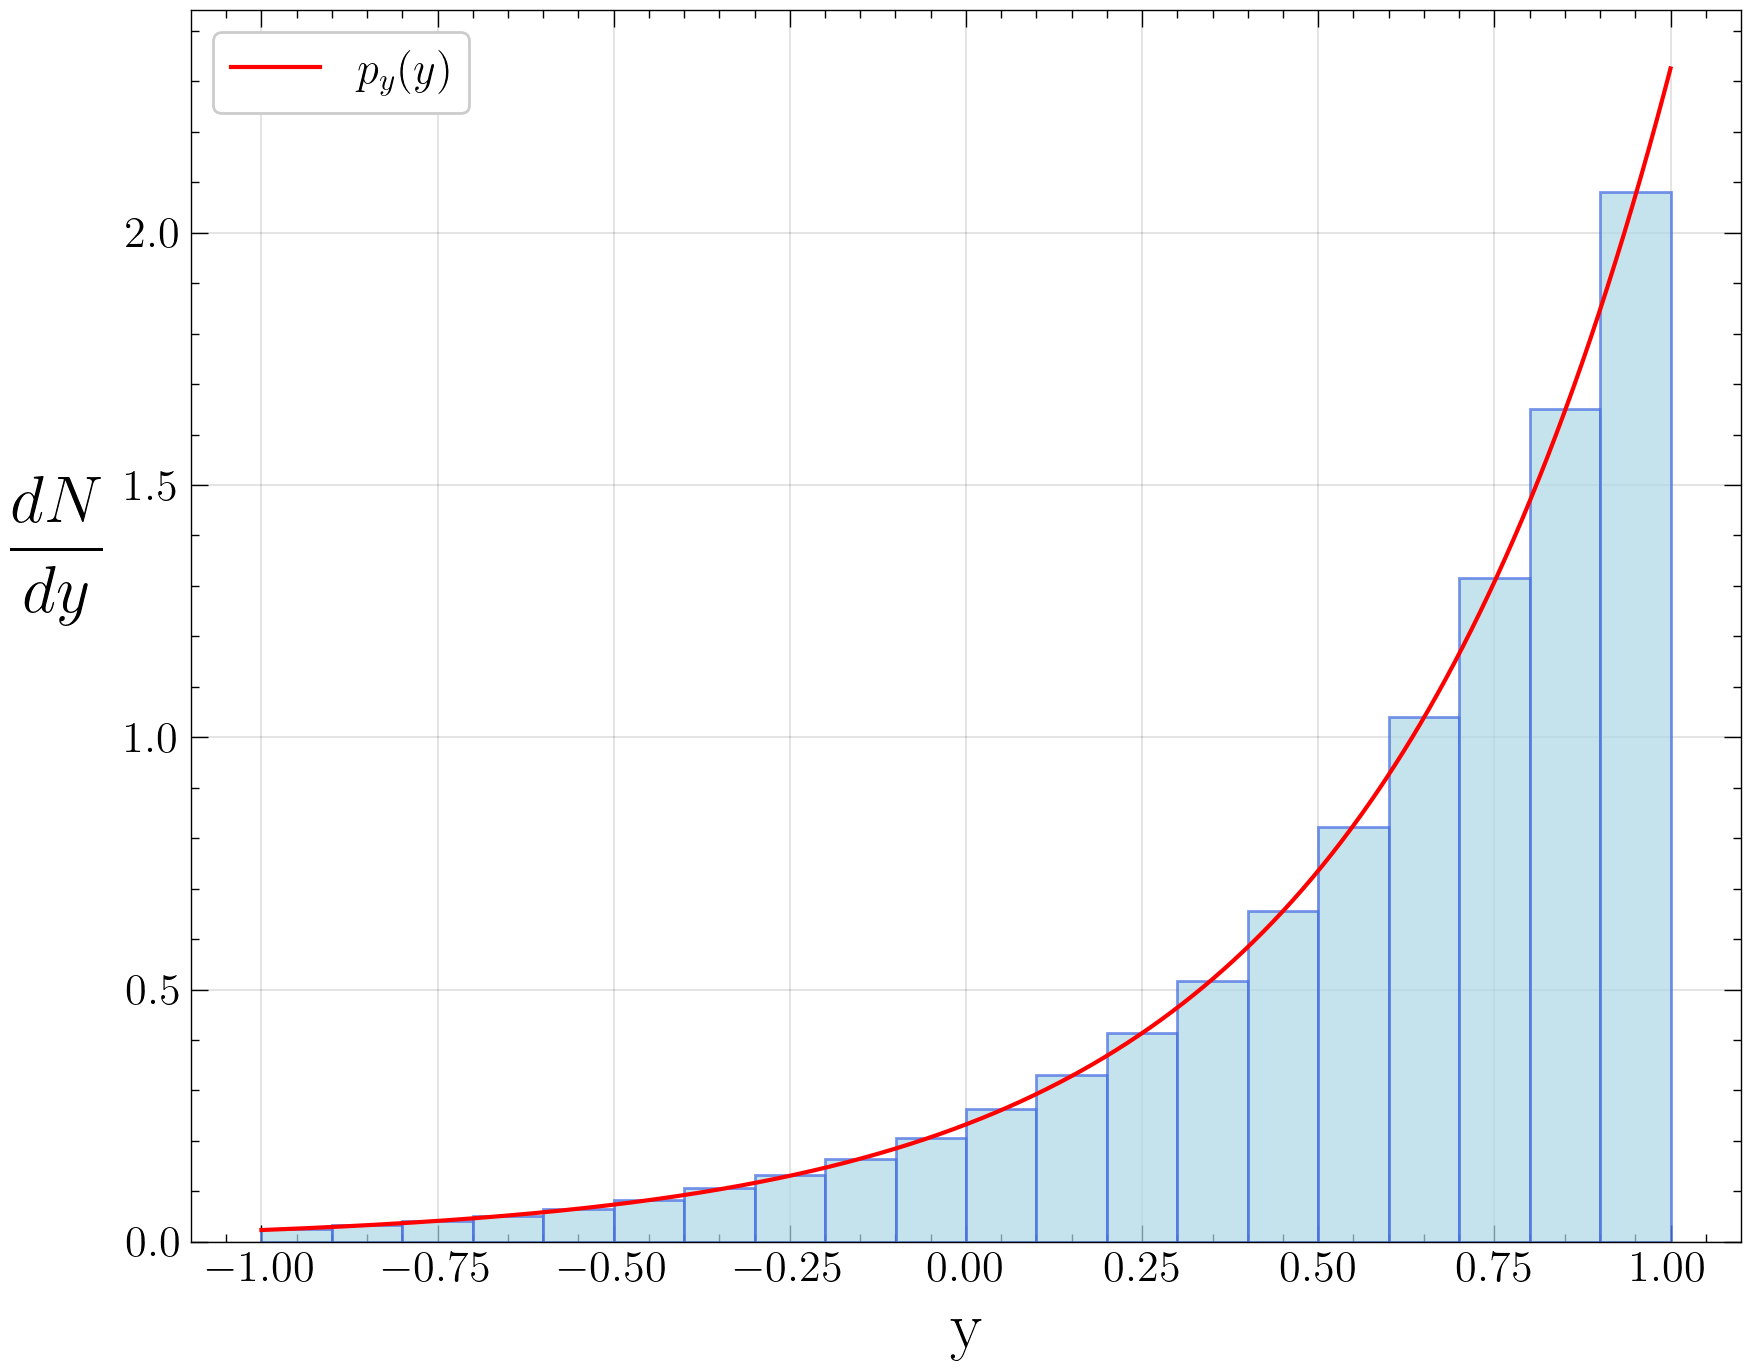

In [5]:
plt.hist(y, bins=20, density=True, color='lightblue', edgecolor='royalblue', alpha=0.7)

y_dense = np.linspace(np.min(y), np.max(y), 1000)
plt.plot(y_dense, (np.log(10)/9.9)*(10**y_dense), c='red', label='$p_y(y)$')
plt.xlabel('y')
plt.ylabel('$\\dfrac{dN}{dy}$', rotation=0, labelpad=25)
plt.legend();

In [6]:
log10_x_mean = np.log10(np.mean(x))
y_mean = np.mean(y)

print(log10_x_mean)
print(y_mean)

0.7035992346814032
0.5862554051842301


In [7]:
log10_x_median = np.log10(np.median(x))
y_median = np.median(y)

print(log10_x_median)
print(y_median)

0.7040012704067535
0.7040012704067418
